In [3]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_excel
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras import metrics
import numpy as np
import numpy
import keras
dataset = read_excel(r'C:\Users\euripab\Desktop\ML Extraction\Statistics\results2_MeanMaxMin_SupervisedData\supervised_all_21_1.xlsx')
dataset = dataset.sample(frac=1, replace=False)
#dataset = dataset.reset_index(drop=True)
dataset

,CQImoyen mean(t-21),CQImoyen min(t-21),CQImoyen max(t-21),TraficDataDL mean(t-21),TraficDataDL min(t-21),TraficDataDL max(t-21),TraficDataUL mean(t-21),TraficDataUL min(t-21),TraficDataUL max(t-21),VoIPqualitymeasinsuffstat mean(t-21),...,VoIPqualitymeasinsuffstat max(t),CROZON_NombredeConnexionsPS mean(t),CROZON_NombredeConnexionsPS min(t),CROZON_NombredeConnexionsPS max(t),nbUEVoIPqualityOK mean(t),nbUEVoIPqualityOK min(t),nbUEVoIPqualityOK max(t),Nbrtentatives_QCi5__TEAVoix mean(t),Nbrtentatives_QCi5__TEAVoix min(t),Nbrtentatives_QCi5__TEAVoix max(t)
30,12.514706,12.10,12.97,1113.490588,274.63,2015.80,209.432353,12.78,958.91,2.823529,...,49,5019.235294,3243,6811,16.411765,1,32,1232.411765,757,1919
1157,11.856471,11.41,12.38,1427.311176,141.21,6902.17,143.797647,11.03,384.85,9.588235,...,51,3955.764706,903,6397,11.529412,1,27,886.058824,157,1365
2214,11.297059,10.61,12.25,55.171176,1.68,234.58,5.072941,0.38,23.19,2.470588,...,17,205.117647,111,312,2.000000,0,16,29.058824,11,75
1776,14.200588,14.11,14.27,509.986471,194.10,883.58,71.884706,16.75,483.03,1.588235,...,4,1946.941176,585,2959,1.647059,0,5,371.411765,111,571
1592,12.381765,11.80,12.91,743.800000,217.91,1259.41,54.274706,21.45,102.23,6.117647,...,45,2144.470588,1700,2835,17.764706,2,28,658.529412,529,872
2182,10.714706,9.90,12.18,54.504706,4.39,234.97,10.180588,0.25,45.32,1.352941,...,7,47.235294,24,87,0.764706,0,3,17.411765,3,52
378,11.978824,11.23,13.11,604.217647,122.60,1133.34,69.738824,22.30,219.11,10.058824,...,49,1043.647059,447,1517,10.411765,0,30,231.647059,100,360
60,11.918235,11.22,13.18,3711.170000,511.50,7417.06,488.212353,48.07,916.23,20.470588,...,68,4932.705882,1970,7755,22.647059,0,53,981.823529,361,1408
259,10.375294,9.68,11.27,529.012353,88.16,955.49,75.268824,6.14,172.04,7.647059,...,71,3559.529412,919,5792,10.411765,0,19,736.882353,89,1393
242,11.724118,10.55,12.99,1590.482941,802.28,2691.55,199.435882,51.99,987.73,7.470588,...,36,3877.176471,1502,5468,11.352941,0,25,839.705882,152,1509


Train on 1000 samples, validate on 1530 samples
Epoch 1/50
 - 0s - loss: 0.0688 - mean_squared_error: 0.0688 - val_loss: 0.0347 - val_mean_squared_error: 0.0347
Epoch 2/50
 - 0s - loss: 0.0350 - mean_squared_error: 0.0350 - val_loss: 0.0312 - val_mean_squared_error: 0.0312
Epoch 3/50
 - 0s - loss: 0.0244 - mean_squared_error: 0.0244 - val_loss: 0.0234 - val_mean_squared_error: 0.0234
Epoch 4/50
 - 0s - loss: 0.0181 - mean_squared_error: 0.0181 - val_loss: 0.0162 - val_mean_squared_error: 0.0162
Epoch 5/50
 - 0s - loss: 0.0149 - mean_squared_error: 0.0149 - val_loss: 0.0194 - val_mean_squared_error: 0.0194
Epoch 6/50
 - 0s - loss: 0.0129 - mean_squared_error: 0.0129 - val_loss: 0.0083 - val_mean_squared_error: 0.0083
Epoch 7/50
 - 0s - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.0064 - val_mean_squared_error: 0.0064
Epoch 8/50
 - 0s - loss: 0.0130 - mean_squared_error: 0.0130 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 9/50
 - 0s - loss: 0.0119 - mean_squared_e

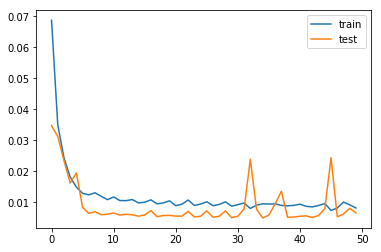

Test RMSE: 0.081


In [5]:
values = dataset.values


n_days_pred = 1 
n_days = 21
n_features = 7*3
n_obs = n_days*n_features
n_train_samples = 1000
values = values.astype('float32')
#Scale Data
scaler = MinMaxScaler()
values = scaler.fit_transform(values)

dictionary = dict(zip(dataset.columns, range(0,len(dataset.columns))))

feat_list = [(i-1)*7*n_features+j for j in range(0,n_features) for i in range(1,4)]

train = values[:n_train_samples, :]
test = values[n_train_samples:, :]
# split into input and outputs
n_obs = n_days * n_features
train_X, train_y = train[:, feat_list], train[:,dictionary['CQImoyen max(t)']]
test_X, test_y = test[:, feat_list], test[:,dictionary['CQImoyen max(t)']]


#Split Values into Classification columns
#train_y = keras.utils.to_categorical(train_y,num_classes=num_classes)
#test_y = keras.utils.to_categorical(test_y,num_classes=num_classes)
# reshape input to be 3D [samples, timesteps, features]
#train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
#test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
#print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
dim = len(feat_list)

# design network
model = Sequential()
model.add(Dense(dim*10, activation='relu', input_dim =dim))
model.add(Dense(dim*2, activation='sigmoid'))
model.add(Dense(1,activation = 'relu'))
model.compile(loss='mse', optimizer='rmsprop',metrics=[metrics.mse])
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y),verbose = 2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
# make a prediction
yhat = model.predict(test_X)

rmse = sqrt(mean_squared_error(test_y, yhat))
print('Test RMSE: %.3f' % rmse)





In [6]:
y_pred_train = model.predict(train_X)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000F5E1B00>]],
      dtype=object)

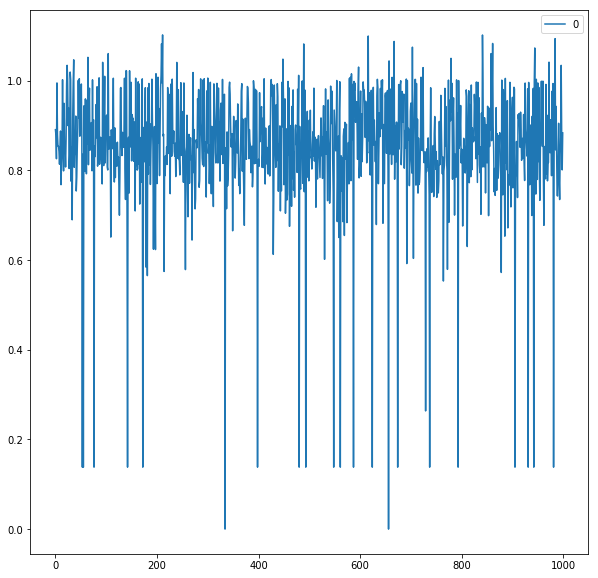

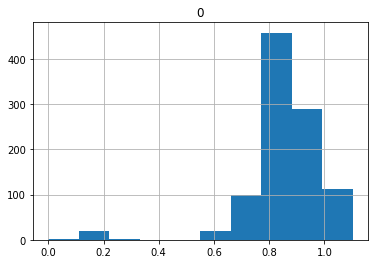

In [7]:
DataFrame(y_pred_train).plot(figsize = (10,10))
DataFrame(y_pred_train).hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000F8B5518>]],
      dtype=object)

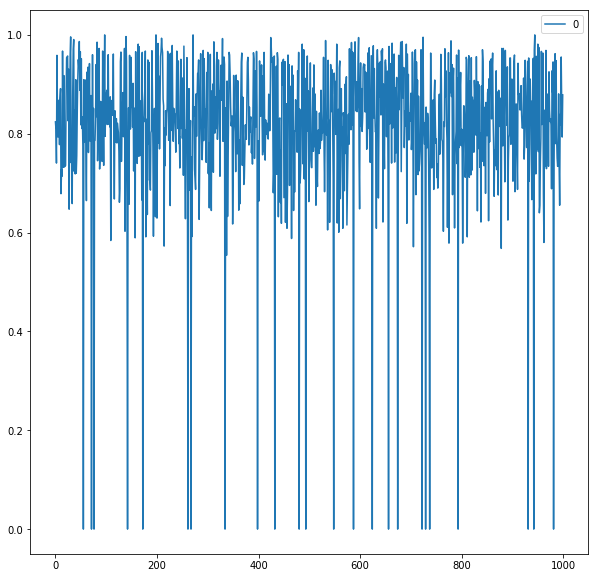

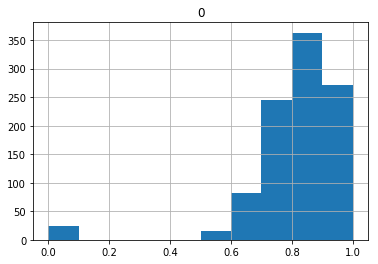

In [8]:
DataFrame(train_y).plot(figsize = (10,10))
DataFrame(train_y).hist()

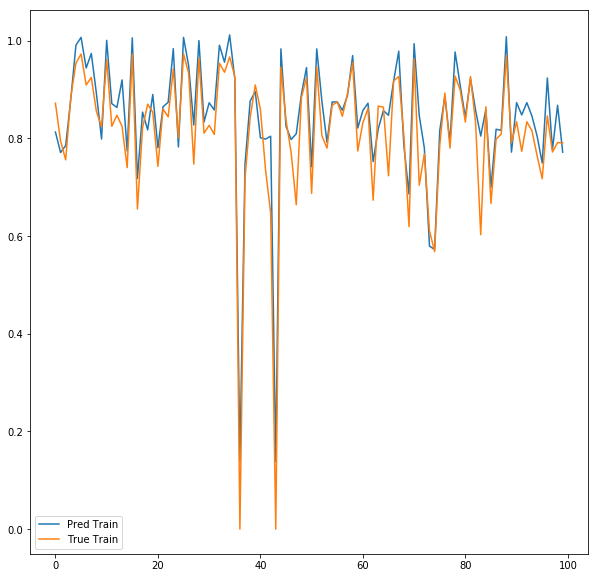

In [9]:
res = DataFrame()
n = np.random.choice(len(train_y), 100)
res['Pred Train'] = DataFrame(y_pred_train[n])[0]
res['True Train'] = DataFrame(train_y[n])[0]
res.plot(figsize = (10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000F9979E8>]],
      dtype=object)

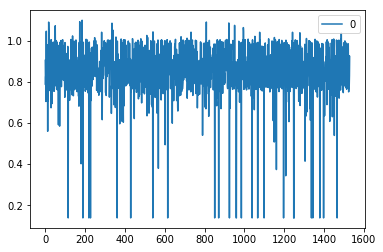

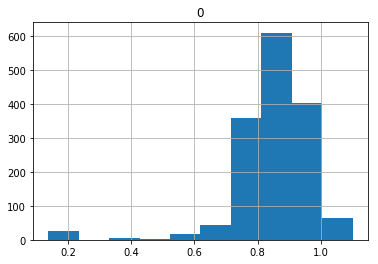

In [10]:
y_pred_test = model.predict(test_X)
DataFrame(y_pred_test).plot()
DataFrame(y_pred_test).hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000FA22198>]],
      dtype=object)

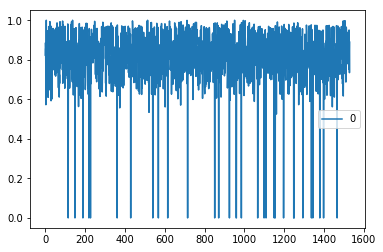

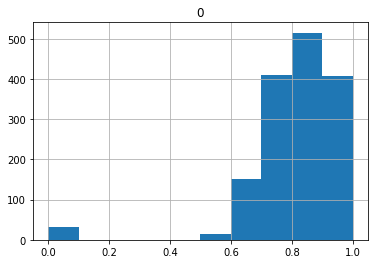

In [11]:
DataFrame(test_y).plot()
DataFrame(test_y).hist()

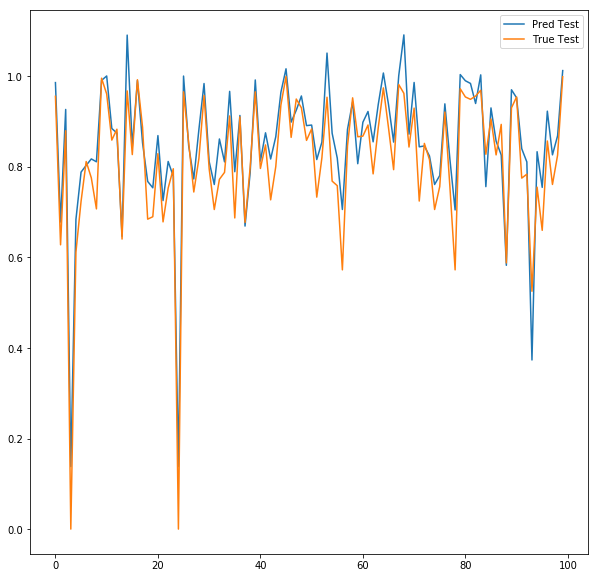

In [12]:
res = DataFrame()
n = np.random.choice(len(test_y), 100)
res['Pred Test'] = DataFrame(y_pred_test[n])[0]
res['True Test'] = DataFrame(test_y[n])[0]
res.plot(figsize = (10,10))

In [24]:
mask1 = [DataFrame(yhat)[0]>0.5]
numpy.sum(mask1)

3077

In [11]:
mask2 = [DataFrame(test_y)[0]>0.5]
numpy.sum(mask2)

3074

In [12]:
a = [mask1[i] == mask2[i] for i in range(0,len(mask1))]
numpy.sum(a)/len(test)

0.021019108280254776

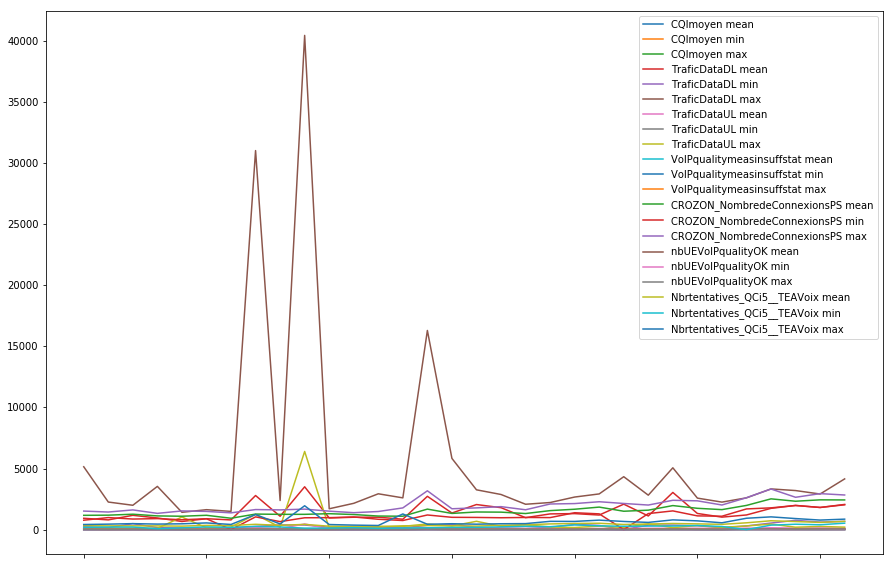

In [13]:
cellKpi= pd.read_excel(r'C:\Users\euripab\Desktop\ML Extraction\Statistics\results1_MeanMaxMin_PerDay\MeanMaxMin_PerDay_all_D10664B.xlsx')
cellKpi.plot(y =cellKpi.columns, kind='line',figsize = (15,10))

In [14]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [(name+'(t-%d)' % (i)) for name in data.columns]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [name+'(t)' for name in data.columns]
		else:
			names += [(name+'(t+%d)' % (i)) for name in data.columns]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg


In [15]:
example_values = series_to_supervised(cellKpi, n_in=1, n_out=7, dropnan=True).values
example_values = scaler.transform(example_values)

ValueError: operands could not be broadcast together with shapes (25,168) (315,) (25,168) 

In [ ]:
example_values_X = example_values[:, range(0,n_obs)]
example_values_y = example_values[:, n_obs+(n_days_pred-1)*n_features+1]

In [ ]:
yhat = model.predict(example_values_X)

In [ ]:
ex = DataFrame()
ex['Pred'] = DataFrame(yhat)[0]
ex['True'] = DataFrame(example_values_y)[0]
ex.plot()

In [55]:
dictionary

{'CQImoyen mean(t-14)': 0,
 'CQImoyen min(t-14)': 1,
 'CQImoyen max(t-14)': 2,
 'TraficDataDL mean(t-14)': 3,
 'TraficDataDL min(t-14)': 4,
 'TraficDataDL max(t-14)': 5,
 'TraficDataUL mean(t-14)': 6,
 'TraficDataUL min(t-14)': 7,
 'TraficDataUL max(t-14)': 8,
 'VoIPqualitymeasinsuffstat mean(t-14)': 9,
 'VoIPqualitymeasinsuffstat min(t-14)': 10,
 'VoIPqualitymeasinsuffstat max(t-14)': 11,
 'CROZON_NombredeConnexionsPS mean(t-14)': 12,
 'CROZON_NombredeConnexionsPS min(t-14)': 13,
 'CROZON_NombredeConnexionsPS max(t-14)': 14,
 'nbUEVoIPqualityOK mean(t-14)': 15,
 'nbUEVoIPqualityOK min(t-14)': 16,
 'nbUEVoIPqualityOK max(t-14)': 17,
 'Nbrtentatives_QCi5__TEAVoix mean(t-14)': 18,
 'Nbrtentatives_QCi5__TEAVoix min(t-14)': 19,
 'Nbrtentatives_QCi5__TEAVoix max(t-14)': 20,
 'CQImoyen mean(t-13)': 21,
 'CQImoyen min(t-13)': 22,
 'CQImoyen max(t-13)': 23,
 'TraficDataDL mean(t-13)': 24,
 'TraficDataDL min(t-13)': 25,
 'TraficDataDL max(t-13)': 26,
 'TraficDataUL mean(t-13)': 27,
 'TraficData

275